In [ ]:
!pip install yfinance 

Importing the necessary libraries

In [ ]:
import pandas as pd
import yfinance as yf
import datetime 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from textblob import TextBlob
import sys
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import datetime 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from sklearn import tree
from pydotplus import graph_from_dot_data
import graphviz
from sklearn.metrics import r2_score, mean_squared_error

Mounting google drive into the collab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


reading the required files

In [ ]:
#getting the required data from the files that we have loaded in our drive
tweet_path='/content/drive/Shareddrives/IS707_project/Tweet.csv'
company_tweets = pd.read_csv(tweet_path)
company_tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [ ]:
company_tweets["post_date"] = pd.to_datetime(company_tweets['post_date'],unit='s').dt.strftime('%d-%m-%Y')
company_tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,01-01-2015,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,01-01-2015,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,01-01-2015,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,01-01-2015,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,01-01-2015,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [ ]:
companies_path='/content/drive/Shareddrives/IS707_project/Company_Tweet.csv'
company_tweets_associate = pd.read_csv(companies_path)
company_tweets_associate.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


** Pre Processing Part 1: Data Exploration and pre preocessing to know what data we are handling and how it looks.**



1. Merging the tweets data with the company data to get the tweets of each compnay.

2. finding all the unique companies in our data set.

3. Finding the total engagement per tweet to see the  popularity of the tweets by getting the sum of the number of comments,retweet numbers and number of likes.

4. Removing duplicate tweets based on the tweet ID.

5. Keeping only the data that has total_engagement greater than 50 so that we can only look at popular tweets

3. Setting the index of the Dataframe as tweet ID as it is a unique identifier.






In [ ]:
tweets_for_company= pd.merge(company_tweets,company_tweets_associate,on=['tweet_id'], how= "inner")
tweets_for_company.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,01-01-2015,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,01-01-2015,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,01-01-2015,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,01-01-2015,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,01-01-2015,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [ ]:
tweets_for_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   writer         object
 2   post_date      object
 3   body           object
 4   comment_num    int64 
 5   retweet_num    int64 
 6   like_num       int64 
 7   ticker_symbol  object
dtypes: int64(4), object(4)
memory usage: 297.8+ MB


In [ ]:
tweets_for_company['ticker_symbol'].unique()

array(['AAPL', 'AMZN', 'TSLA', 'MSFT', 'GOOG', 'GOOGL'], dtype=object)

In [ ]:
total = tweets_for_company["comment_num"] + tweets_for_company["retweet_num"] + tweets_for_company["like_num"]
tweets_for_company["total_engangement"] = total

In [ ]:
tweets_for_company.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,total_engangement
0,550441509175443456,VisualStockRSRC,01-01-2015,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,1
1,550441672312512512,KeralaGuy77,01-01-2015,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,0
2,550441732014223360,DozenStocks,01-01-2015,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,0
3,550442977802207232,ShowDreamCar,01-01-2015,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,1
4,550443807834402816,i_Know_First,01-01-2015,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,1


In [ ]:
tweets_for_company.drop_duplicates(subset=['tweet_id'],inplace=True)

In [ ]:
filter_on_engagement=tweets_for_company.loc[tweets_for_company["total_engangement"] >50]
filter_on_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38776 entries, 38 to 4336318
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           38776 non-null  int64 
 1   writer             38420 non-null  object
 2   post_date          38776 non-null  object
 3   body               38776 non-null  object
 4   comment_num        38776 non-null  int64 
 5   retweet_num        38776 non-null  int64 
 6   like_num           38776 non-null  int64 
 7   ticker_symbol      38776 non-null  object
 8   total_engangement  38776 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
filter_on_engagement.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,total_engangement
38,550453624258965505,WSJ,01-01-2015,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,AMZN,217
132,550499176422051840,WSJ,01-01-2015,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,AMZN,187
294,550650235404701697,greatspoke,01-01-2015,Analyst Report on Top Stock Market Options for...,0,430,3,AAPL,433
296,550650451948212224,greatspoke,01-01-2015,Top Stock Analyst Releases Report on Top Stock...,0,431,2,AAPL,433
626,550779709840445441,WSJ,01-01-2015,"See how tech companies like Apple, Twitter and...",15,223,109,AAPL,347


In [ ]:
filter_on_engagement.set_index('tweet_id')

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,total_engangement
tweet_id,,,,,,,,
550453624258965505,WSJ,01-01-2015,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,AMZN,217
550499176422051840,WSJ,01-01-2015,Jeff Bezos lost $7.4 billion in Amazon's worst...,17,113,57,AMZN,187
550650235404701697,greatspoke,01-01-2015,Analyst Report on Top Stock Market Options for...,0,430,3,AAPL,433
550650451948212224,greatspoke,01-01-2015,Top Stock Analyst Releases Report on Top Stock...,0,431,2,AAPL,433
550779709840445441,WSJ,01-01-2015,"See how tech companies like Apple, Twitter and...",15,223,109,AAPL,347
...,...,...,...,...,...,...,...,...
1212102550327037952,TeslaPodcast,31-12-2019,What a nice little surprise to find at the gro...,39,23,521,TSLA,583
1212110813093339141,ValueAnalyst1,31-12-2019,"Dumb question, is this enough people to run a ...",4,3,49,TSLA,56
1212111064730603521,freshjiva,31-12-2019,My top picks for 2020 (in no particular order)...,11,8,66,TSLA,85


Pre Processing Part 2: Cleaning the data and Assigning the sentiment to the tweets


1. Cleaning the data by removing the hashtags,non aplha numeric symbols and links.
2. Using the vader library's SentimentIntensityAnalyzer to assign the scores to the tweets.
3. Convereting the "post_date" column of the data frame to a datetime object for further analysis.



In [ ]:
pd.options.mode.chained_assignment = None
nltk.download('words')
words = set(nltk.corpus.words.words())

def cleaner(text):
    text = re.sub("@[A-Za-z0-9]+","",text) #Remove @ sign
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text) #Remove http links
    #text=re.sub('[\W_]+', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = " ".join(text.split())
    text = text.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    text = text.replace("$", "")
    text = " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha())
    return text
filter_on_engagement['body'] = filter_on_engagement['body'].map(lambda x: cleaner(x))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
filter_on_engagement.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,total_engangement
38,550453624258965505,WSJ,01-01-2015,Jeff lost . billion in ' s worst year since :,21,139,57,AMZN,217
132,550499176422051840,WSJ,01-01-2015,Jeff lost . billion in ' s worst year since :,17,113,57,AMZN,187
294,550650235404701697,greatspoke,01-01-2015,Analyst Report on Top Stock Market for Read He...,0,430,3,AAPL,433
296,550650451948212224,greatspoke,01-01-2015,Top Stock Analyst Report on Top Stocks for T BABA,0,431,2,AAPL,433
626,550779709840445441,WSJ,01-01-2015,"See how tech like Apple , Twitter and rank in ...",15,223,109,AAPL,347


In [ ]:
nltk.download('vader_lexicon')

#filter_on_engagement[['polarity', 'subjectivity']] = filter_on_engagement['body'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in filter_on_engagement['body'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  comp = score['compound']
  if comp < 0:
    filter_on_engagement.loc[index, 'sentiment'] = 'negative'
  elif comp == 0:
    filter_on_engagement.loc[index, 'sentiment'] = 'neutral'
  else:
    filter_on_engagement.loc[index, 'sentiment'] = 'positive'
  filter_on_engagement.loc[index, 'compound'] = comp

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
filter_on_engagement

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,total_engangement,sentiment,compound
38,550453624258965505,WSJ,01-01-2015,Jeff lost . billion in ' s worst year since :,21,139,57,AMZN,217,negative,-0.7506
132,550499176422051840,WSJ,01-01-2015,Jeff lost . billion in ' s worst year since :,17,113,57,AMZN,187,negative,-0.7506
294,550650235404701697,greatspoke,01-01-2015,Analyst Report on Top Stock Market for Read He...,0,430,3,AAPL,433,positive,0.2023
296,550650451948212224,greatspoke,01-01-2015,Top Stock Analyst Report on Top Stocks for T BABA,0,431,2,AAPL,433,positive,0.3818
626,550779709840445441,WSJ,01-01-2015,"See how tech like Apple , Twitter and rank in ...",15,223,109,AAPL,347,positive,0.3612
...,...,...,...,...,...,...,...,...,...,...,...
4335944,1212102550327037952,TeslaPodcast,31-12-2019,What a nice little surprise to find at the gro...,39,23,521,TSLA,583,positive,0.8316
4336091,1212110813093339141,ValueAnalyst1,31-12-2019,"Dumb question , is this enough people to run a...",4,3,49,TSLA,56,negative,-0.5106
4336097,1212111064730603521,freshjiva,31-12-2019,My top for ( in no particular order ):,11,8,66,TSLA,85,negative,-0.4939
4336189,1212117275999965185,TradeWithNinja,31-12-2019,say this now and say it loud . Market ! SPY es...,1,9,53,AMZN,63,neutral,0.0000


In [ ]:
filter_on_engagement['post_date'] = pd.to_datetime(filter_on_engagement['post_date'])
filter_on_engagement['post_date'] = filter_on_engagement['post_date'].dt.date
filter_on_engagement.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,total_engangement,sentiment,compound
38,550453624258965505,WSJ,2015-01-01,Jeff lost . billion in ' s worst year since :,21,139,57,AMZN,217,negative,-0.7506
132,550499176422051840,WSJ,2015-01-01,Jeff lost . billion in ' s worst year since :,17,113,57,AMZN,187,negative,-0.7506
294,550650235404701697,greatspoke,2015-01-01,Analyst Report on Top Stock Market for Read He...,0,430,3,AAPL,433,positive,0.2023
296,550650451948212224,greatspoke,2015-01-01,Top Stock Analyst Report on Top Stocks for T BABA,0,431,2,AAPL,433,positive,0.3818
626,550779709840445441,WSJ,2015-01-01,"See how tech like Apple , Twitter and rank in ...",15,223,109,AAPL,347,positive,0.3612


Pre Processing Part 3: Getting the stock data


1. Getting the stock data from Yahoo Finance for each company 
2. Resetting the index so that the "Date" column can be used for further processing.
3. Taking the difference in closing price of the previous day and the current day to see if the stock price has increased  or decreased on that particular date. 
Note: this step is done only for Data Expolration purposes and is not used for any other purpose.


In [ ]:
stock_data=pd.DataFrame()
companies=filter_on_engagement['ticker_symbol'].unique()
print(companies)

for company in companies:
  start_date=filter_on_engagement[filter_on_engagement['ticker_symbol']==company].post_date.min()
  end_date=filter_on_engagement[filter_on_engagement['ticker_symbol']==company].post_date.max()
  to_consider=end_date + datetime.timedelta(days=1)
  to_start=start_date-datetime.timedelta(days=1)
  df = yf.download(company, start=to_start,end=end_date)
  df['ticker_symbol']=company
  stock_data=stock_data.append(df)
  #print(start_date,i,to_consider)
  #print(i,df.head())





['AMZN' 'AAPL' 'GOOG' 'TSLA' 'GOOGL' 'MSFT']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data.reset_index(inplace=True)

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Date'] = stock_data['Date'].dt.date
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker_symbol
0,2014-12-31,311.549988,312.980011,310.010010,310.350006,310.350006,2048000,AMZN
1,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,AMZN
2,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,AMZN
3,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,AMZN
4,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,AMZN


In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker_symbol
0,2014-12-31,311.549988,312.980011,310.010010,310.350006,310.350006,2048000,AMZN
1,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,AMZN
2,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,AMZN
3,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,AMZN
4,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,AMZN


In [ ]:
#taking the difference in tyhe closing price of the previous day and the partcular day to see if the stock prices have gonw up or down or if there is no difference
stock_data['differece']=stock_data['Close'].diff()

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker_symbol,differece
0,2014-12-31,311.549988,312.980011,310.010010,310.350006,310.350006,2048000,AMZN,NaN
1,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,AMZN,-1.830017
2,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,AMZN,-6.329987
3,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,AMZN,-6.899994
4,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,AMZN,3.130005


In [ ]:
stock_data.dropna(subset=['differece'],inplace=True)

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker_symbol,differece
1,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,AMZN,-1.830017
2,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,AMZN,-6.329987
3,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,AMZN,-6.899994
4,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,AMZN,3.130005
5,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400,AMZN,2.039978


In [ ]:
#creating new column to inform if the value of the stocks has gone up or down 
stock_data['label'] = stock_data['differece'].apply(lambda x: 'Up' if x > 0 else ('None' if  x==0 else 'down' ))

**we use lablel to confirm if the value of the stock has increased or decresed from the previous day**

In [ ]:
stock_data.rename(columns = {'Date':'date','ticker_symbol':'company'}, inplace = True)
stock_data.head()

,date,Open,High,Low,Close,Adj Close,Volume,company,differece,label
1,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,AMZN,-1.830017,down
2,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,AMZN,-6.329987,down
3,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,AMZN,-6.899994,down
4,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,AMZN,3.130005,Up
5,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400,AMZN,2.039978,Up


In the below step we are calculating the count of  each sentiment for each day for a given company and the sentiment that has the maximum count will be assigned as the max sentiment of that day. For example on "	2015-01-01" the sentiment "negative" had  highest count compared to the counts of "positive" and "neutral"  for the company AMZN and hence the overall sentiment will be "negative" on "	2015-01-01" for AMZN.

In [ ]:
#from operator import itemgetter
unique_sentiments=list(filter_on_engagement['sentiment'].unique())


new_lst=[]
for comp in companies:
  date_list=list(filter_on_engagement[filter_on_engagement['ticker_symbol']==comp].post_date.unique())
  #clean_data['company']=i
  for day in date_list:
    my_list=[]
    for senti in unique_sentiments:
      #clean_data['date']=j
      #clean_data['sentiment']=k
      sentiment_cnt=filter_on_engagement[['sentiment']].loc[(filter_on_engagement['ticker_symbol']==comp) & (filter_on_engagement['post_date']==day) & (filter_on_engagement['sentiment']==senti)].sentiment.count()
      #literal_list.append((j,i,k,sentiment_cnt))
      my_list.append([senti,sentiment_cnt])
    res1 = max(my_list, key=itemgetter(1))
    max_sent=res1[0]
    cont=res1[1]
    new_lst.append([day,comp,max_sent])


      
      #print(sentiment_cnt)
cleaned_max_sentiment_data = pd.DataFrame(new_lst, columns=['date', 'company', 'maximum_sentiment'])  

cleaned_max_sentiment_data.head()

,date,company,maximum_sentiment
0,2015-01-01,AMZN,negative
1,2015-01-14,AMZN,positive
2,2015-01-21,AMZN,negative
3,2015-01-29,AMZN,neutral
4,2015-01-30,AMZN,positive


In [ ]:
cleaned_max_sentiment_data

,date,company,maximum_sentiment
0,2015-01-01,AMZN,negative
1,2015-01-14,AMZN,positive
2,2015-01-21,AMZN,negative
3,2015-01-29,AMZN,neutral
4,2015-01-30,AMZN,positive
...,...,...,...
4988,2019-12-23,MSFT,neutral
4989,2019-12-27,MSFT,positive
4990,2019-12-28,MSFT,neutral
4991,2019-12-29,MSFT,positive


Merging the stock dataset and the overall sentiment dataset into one dataframe using the common coulmns of date and company.

In [ ]:
merged_dataset=pd.merge(cleaned_max_sentiment_data,stock_data, on=['date','company'])

In [ ]:
merged_dataset.head()

,date,company,maximum_sentiment,Open,High,Low,Close,Adj Close,Volume,differece,label
0,2015-01-14,AMZN,positive,291.929993,295.910004,286.500000,293.269989,293.269989,5538700,-1.470001,down
1,2015-01-21,AMZN,negative,289.640015,306.000000,287.260010,297.250000,297.250000,10065100,7.809998,Up
2,2015-01-29,AMZN,neutral,304.730011,312.799988,299.329987,311.779999,311.779999,8656600,7.869995,Up
3,2015-01-30,AMZN,positive,346.320007,359.500000,340.739990,354.529999,354.529999,23856100,42.750000,Up
4,2015-01-02,AMZN,neutral,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,-1.830017,down


Rounding the float values to a precsion of 2 decimals to simplify the calculations.

In [ ]:
merged_dataset['Open']=merged_dataset['Open'].round(decimals=2)
merged_dataset['High']=merged_dataset['High'].round(decimals=2)
merged_dataset['Low']=merged_dataset['Low'].round(decimals=2)
merged_dataset['Close']=merged_dataset['Close'].round(decimals=2)
merged_dataset['Adj Close']=merged_dataset['Adj Close'].round(decimals=2)

In [ ]:
merged_dataset.head()

,date,company,maximum_sentiment,Open,High,Low,Close,Adj Close,Volume,differece,label
0,2015-01-14,AMZN,positive,291.93,295.91,286.50,293.27,293.27,5538700,-1.470001,down
1,2015-01-21,AMZN,negative,289.64,306.00,287.26,297.25,297.25,10065100,7.809998,Up
2,2015-01-29,AMZN,neutral,304.73,312.80,299.33,311.78,311.78,8656600,7.869995,Up
3,2015-01-30,AMZN,positive,346.32,359.50,340.74,354.53,354.53,23856100,42.750000,Up
4,2015-01-02,AMZN,neutral,312.58,314.75,306.96,308.52,308.52,2783200,-1.830017,down


Pre Processing Part 4: data Visualizations:
1. Visualization to see the overall distribution of the sentiments
2. To see the count of the times there was a increase ot decrease in the number of shares when the sentiment was negative.
3. To see the count of the times there was a increase ot decrease in the number of shares when the sentiment was positive.
4. To see the count of the times there was a increase ot decrease in the number of shares when the sentiment was neutral.
5. To see on a given day and a given compamny if there is an influence of the sentiment on increase or decrease of the share.

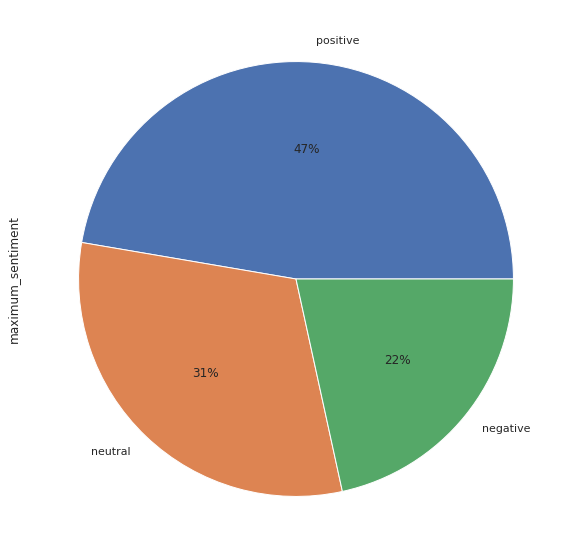

In [ ]:
#import matplotlib.pyplot as plt
merged_dataset.maximum_sentiment.value_counts().plot(kind="pie",autopct="%1.0f%%",figsize=(20,10))

Text(0.5, 1.0, 'negative sentiment and stock')

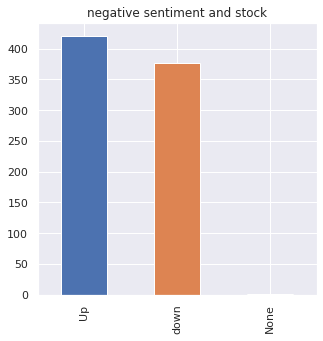

In [ ]:
#import seaborn as sns
#merged_dataset[['label','maximum_sentiment']].loc[merged_dataset['maximum_sentiment']=='negative'].groupby(['label']).maximum_sentiment.value_counts()
merged_dataset['label'][merged_dataset['maximum_sentiment']=='negative'].value_counts().plot(kind = 'bar',figsize=(5,5),color=['C0', 'C1', 'C2'])
plt.title('negative sentiment and stock')


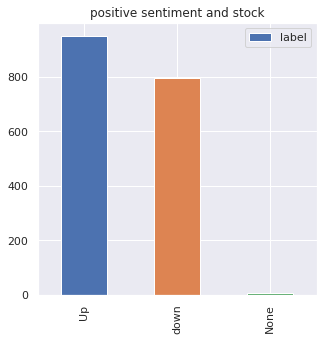

In [ ]:
merged_dataset['label'][merged_dataset['maximum_sentiment']=='positive'].value_counts().plot(kind = 'bar',figsize=(5,5),color=['C0', 'C1', 'C2'])
plt.title('positive sentiment and stock')
plt.legend()

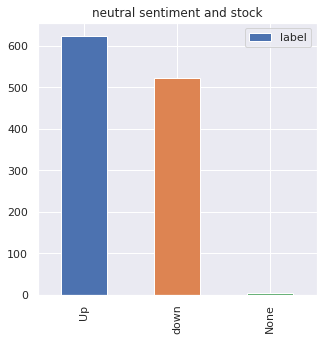

In [ ]:
merged_dataset['label'][merged_dataset['maximum_sentiment']=='neutral'].value_counts().plot(kind = 'bar',figsize=(5,5),color=['C0', 'C1', 'C2'])
plt.title('neutral sentiment and stock')
plt.legend()

Storing the data into the shared drive for future refernces

In [ ]:
filePath = '/content/drive/Shareddrives/IS707_project/final_model.csv'
if os.path.exists(filePath):
    merged_dataset.to_csv(filePath, mode='a', index=False, header=False)
else:
  merged_dataset.to_csv(r'/content/drive/Shareddrives/IS707_project/final_model.csv')

Function to vizualize if the sentiment has influence on the stock price

In [ ]:
def plotgraphs(company , date , daysBefore, daysAfter ):
    
    import datetime
    
    date = pd.to_datetime(date)
    
    
    start1 = date - datetime.timedelta(days=daysBefore)

    
    end1 = date + datetime.timedelta(days=daysAfter)
    
    to_map = merged_dataset
    
    to_map = to_map.loc[merged_dataset["company"]  == company]
    to_map = to_map.loc[to_map["date"] > start1]
    to_map = to_map.loc[to_map["date"] < end1]
    
    from matplotlib.pyplot import figure
    import matplotlib.pyplot as plt

    figure(figsize=(16, 10))
#     sns.set_style("tik")
    plt.xlabel("Date" , fontsize = 18)
    plt.ylabel(f"{company} Price" , fontsize = 18)
    sns.lineplot(
    data = to_map,
        x = 'date',
        y = 'Open',
        color = 'green' , 
    )

    sns.lineplot(
    data = to_map,
        x = 'date',
        y = 'Close', 
        color = 'red'
    )
    plt.axvline(x=date , color = '#42E3BB')
    
    plt.legend(labels=["Day Open","Day Close" , "Date Posted" ],fontsize = 16)

In [ ]:
merged_dataset

,date,company,maximum_sentiment,Open,High,Low,Close,Adj Close,Volume,differece,label
0,2015-01-14,AMZN,positive,291.93,295.91,286.50,293.27,293.27,5538700,-1.470001,down
1,2015-01-21,AMZN,negative,289.64,306.00,287.26,297.25,297.25,10065100,7.809998,Up
2,2015-01-29,AMZN,neutral,304.73,312.80,299.33,311.78,311.78,8656600,7.869995,Up
3,2015-01-30,AMZN,positive,346.32,359.50,340.74,354.53,354.53,23856100,42.750000,Up
4,2015-01-02,AMZN,neutral,312.58,314.75,306.96,308.52,308.52,2783200,-1.830017,down
...,...,...,...,...,...,...,...,...,...,...,...
3698,2019-09-12,MSFT,neutral,137.85,138.42,136.87,137.52,134.21,27010000,1.400009,Up
3699,2019-12-13,MSFT,neutral,153.00,154.89,152.83,154.53,151.33,23845400,1.289993,Up
3700,2019-12-19,MSFT,positive,154.00,155.77,153.75,155.71,152.48,24958900,1.340012,Up
3701,2019-12-23,MSFT,neutral,158.12,158.12,157.27,157.41,154.15,17718200,0.000000,None


/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


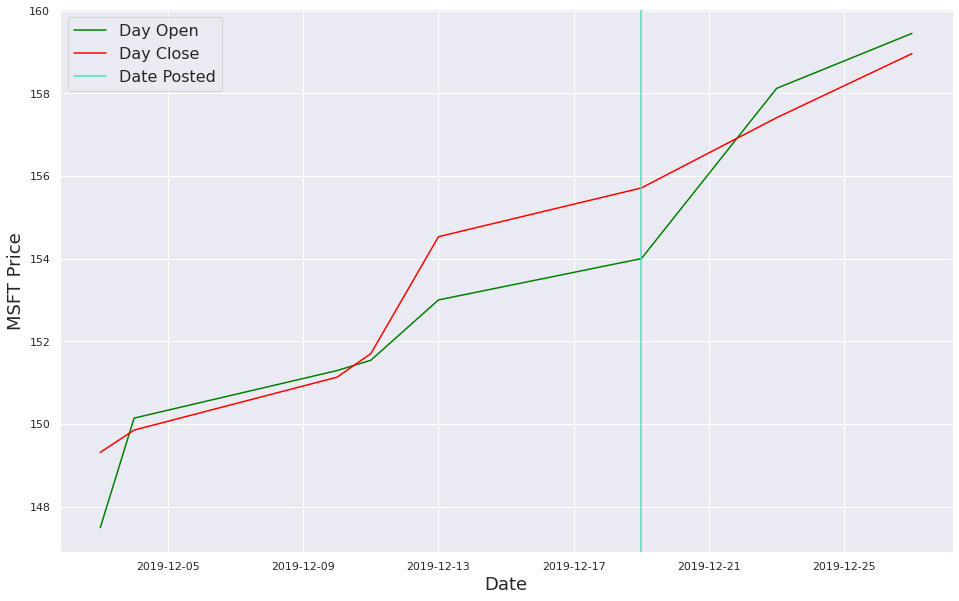

In [ ]:
plotgraphs('MSFT' , '12-19-2019' , 20,  150)

Pre Processing Part 5: Feature Engineering:
1. using label encoder to convert the categorical data into numeric data.
2. Adding a new column with the next day's opening price to create a supervised traing data set where the label will be the next day's opening price.
3. Converting date into float as regression models will not the date datatype as input.
4. getting the feature data with the columns 'date','maximum_sentiment','Open','High','Low','Close','Volume' and the predictor data with the label as "next day opeing price"
5.Splitting the data with 70% trainnig and 30% as test for further analysis.


In [ ]:
#from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
merged_dataset['maximum_sentiment']=labelencoder.fit_transform(merged_dataset['maximum_sentiment'])
merged_dataset['company']=labelencoder.fit_transform(merged_dataset['company'])
merged_dataset['label']=labelencoder.fit_transform(merged_dataset['label'])

In [ ]:
merged_dataset.head()

,date,company,maximum_sentiment,Open,High,Low,Close,Adj Close,Volume,differece,label
0,2015-01-14,1,2,291.93,295.91,286.50,293.27,293.27,5538700,-1.470001,2
1,2015-01-21,1,0,289.64,306.00,287.26,297.25,297.25,10065100,7.809998,1
2,2015-01-29,1,1,304.73,312.80,299.33,311.78,311.78,8656600,7.869995,1
3,2015-01-30,1,2,346.32,359.50,340.74,354.53,354.53,23856100,42.750000,1
4,2015-01-02,1,1,312.58,314.75,306.96,308.52,308.52,2783200,-1.830017,2


In [ ]:
merged_dataset['next_day_opening']=merged_dataset['Open'].shift(-1)

In [ ]:
merged_dataset.dropna(subset=['next_day_opening'],inplace=True)
merged_dataset

,date,company,maximum_sentiment,Open,High,Low,Close,Adj Close,Volume,differece,label,next_day_opening
0,2015-01-14,1,2,291.93,295.91,286.50,293.27,293.27,5538700,-1.470001,2,289.64
1,2015-01-21,1,0,289.64,306.00,287.26,297.25,297.25,10065100,7.809998,1,304.73
2,2015-01-29,1,1,304.73,312.80,299.33,311.78,311.78,8656600,7.869995,1,346.32
3,2015-01-30,1,2,346.32,359.50,340.74,354.53,354.53,23856100,42.750000,1,312.58
4,2015-01-02,1,1,312.58,314.75,306.96,308.52,308.52,2783200,-1.830017,2,384.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3697,2019-11-27,4,1,152.33,152.50,151.52,152.32,149.16,15184400,0.290009,1,137.85
3698,2019-09-12,4,1,137.85,138.42,136.87,137.52,134.21,27010000,1.400009,1,153.00
3699,2019-12-13,4,1,153.00,154.89,152.83,154.53,151.33,23845400,1.289993,1,154.00
3700,2019-12-19,4,2,154.00,155.77,153.75,155.71,152.48,24958900,1.340012,1,158.12


In [ ]:
feature_data=merged_dataset[['date','maximum_sentiment','Open','High','Low','Close','Volume']]
predict_data=merged_dataset['next_day_opening']

In [ ]:
feature_data['date'] = pd.to_datetime(feature_data['date'])
feature_data['date'] = feature_data['date'].dt.date
feature_data['date']=feature_data['date'].astype('datetime64')
feature_data['date'] = feature_data['date'].values.astype("float64")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data,predict_data, test_size=0.30,random_state=42)

Machine Learning models:
Decison trees: 
1. Giving the hyper parameters for max_depth raning from 1 to 6 in order to see at which depth we will get the highest r-squared values.
2. Taking the baseline as a descision tree regression with max_depth as 1 as it is least complex and utilizes minimum number of features.
3. Plotting the decision tree graph to see the regression tree process for both the minimum and maximum depth tree

Liner Regression:
1. Initilizing a linear regression model with default parameters.
2. Fitting the data and getting the scores.
3. plotting the regression between the predicted opening price and the actual test set to see how close the predicted values are to the actual values

Evaluation Critria:
Mean squared Error: 
Mean Square Error is the average of the sum of square of the difference between actual and predicted values.
A large MSE value means that the data values are dispersed widely around the mean of the data and a small MSE value means that the data values are closely dispersed around the mean. i.e. A model with small MSE value has better performance.

R² Score:

R² score also known as the coefficient of determination gives the measure of how good a model fits to a given dataset. It indicates how closer are the predicted values to the actual values.

R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.




In [ ]:
multi_reg_dataset=[]

for max_depth in range(1,6):
  #print(max_depth)
  regr_1 = DecisionTreeRegressor(max_depth=max_depth)
  regr_1.fit(X_train, y_train)
  #print('Variance score: {}'.format(regr_1.score(X1_test, y1_test)))
  pred1 = regr_1.predict(X_test)
  mse = mean_squared_error(y_test, pred1)
  r2 = r2_score(y_test, pred1)
  #print("Mean Squared Error : ", mse)
  #print("R-Squared :" , r2)
  multi_reg_dataset.append([max_depth,mse,r2])

Decsion_tree_dataframe = pd.DataFrame(multi_reg_dataset,columns =['tree_depth','Mean Squared Error','Rsquared'])
Decsion_tree_dataframe.head()

,tree_depth,Mean Squared Error,Rsquared
0,1,69485.050010,0.803597
1,2,19483.451307,0.944929
2,3,12624.966018,0.964315
3,4,10344.863859,0.970760
4,5,10213.597052,0.971131


In [ ]:
max_rsquare=Decsion_tree_dataframe.Rsquared.max()
min_rsquare=Decsion_tree_dataframe.Rsquared.min()
decision_tree_high_score=Decsion_tree_dataframe['tree_depth'][Decsion_tree_dataframe['Rsquared']==max_rsquare].item()
decision_tree_lowest_score=Decsion_tree_dataframe['tree_depth'][Decsion_tree_dataframe['Rsquared']==min_rsquare].item()

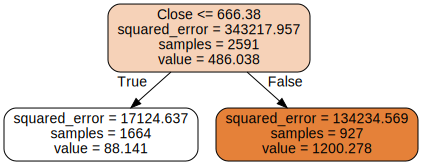

In [ ]:
decision_tree_lowest = DecisionTreeRegressor(max_depth=decision_tree_lowest_score)
decision_tree_lowest.fit(X_train, y_train)
#print('Variance score: {}'.format(regr_1.score(X1_test, y1_test)))
dot_data1 = tree.export_graphviz(decision_tree_lowest, filled=True, rounded=True,
                                feature_names=feature_data.columns,
                                    out_file=None)
graph1 = graphviz.Source(dot_data1, format="png") 
graph1.render('temp_file1',format='png')
graph1

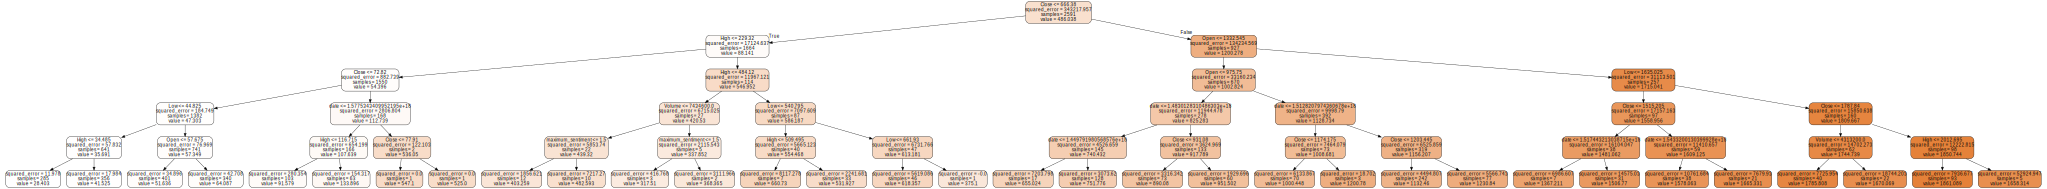

In [ ]:
decision_tree_higest = DecisionTreeRegressor(max_depth=decision_tree_high_score)
decision_tree_higest.fit(X_train, y_train)
#print('Variance score: {}'.format(regr_1.score(X1_test, y1_test)))
dot_data2 = tree.export_graphviz(decision_tree_higest, filled=True, rounded=True,
                                feature_names=feature_data.columns,
                                    out_file=None)
graph2 = graphviz.Source(dot_data2, format="png") 
graph2.render('temp_file',format='png')
graph2

In [ ]:
#liner Regression Model

from sklearn import datasets, linear_model, metrics
Liner_regression = linear_model.LinearRegression()
Liner_regression.fit(X_train, y_train)
# regression coefficients
print('Coefficients of the linear regression are: ', Liner_regression.coef_)
 
# variance score: 1 means perfect prediction
#using the training dataset for the prediction
predictions = Liner_regression.predict(X_test)

#model performance

mse = mean_squared_error(y_test, pred1)
r2 = r2_score(y_test, predictions)#Best fit lineplt.scatter(x, y)


#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , Liner_regression.intercept_)


Coefficients of the linear regression are:  [-2.48406943e-17 -1.93111149e-05  2.49112745e-01  2.51416546e-01
  2.46445502e-01  2.48997953e-01 -3.15691058e-08]
Mean Squared Error :  10247.556601794287
R-Squared : 0.9725524259538277
Y-intercept : 43.09987626621495


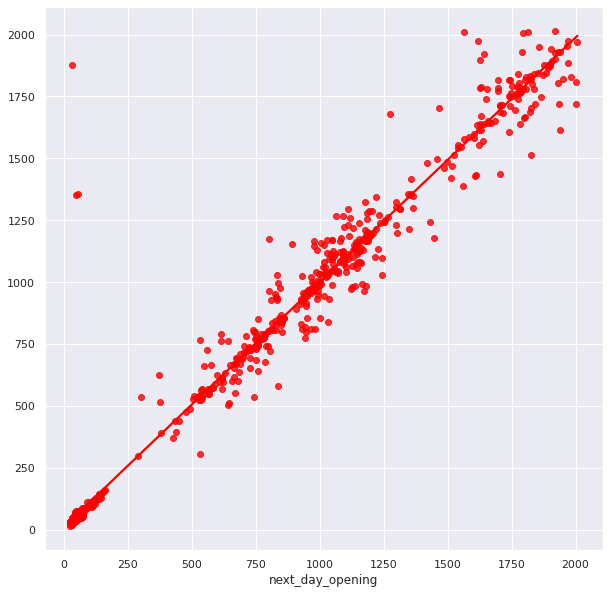

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.regplot(x=y_test,y=predictions,ci=None,color ='red')